In [ ]:
import numpy as np 
from skimage import io, color, exposure
import matplotlib.pyplot as plt

In [ ]:
I = io.imread("/content/tsukuba.png")
print(I.shape)
print("max =", I.max(), "min =", I.min())

(288, 384)
max = 252 min = 0


(-0.5, 383.5, 287.5, -0.5)

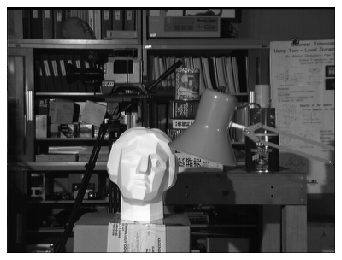

In [ ]:
io.imshow(I)
plt.axis("off")

# Histogram Calculation - Manual

## Histogram

[ 12 139 472 233 304]
[0 1 2 3 4]


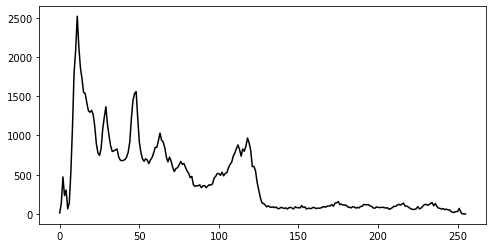

In [ ]:
# pixel values are in between 0 and 255

hist = [] # Count
bins = [] # Intensity values
# TO-DO
for p in range(256): 
  # TO-DO
  count = (I == p).sum()
  bins.append(p)
  hist.append(count)

# convert to numpy array for processing
hist = np.array(hist)
bins = np.array(bins)

print(hist[:5]) # 
print(bins[:5])
                
# Plot 
fig = plt.figure(figsize = (8, 4)) # width, height
plt.plot(bins, hist, 'k') # k means black. Can also be given as color = "black". r g b also available

## Normalized Histogram

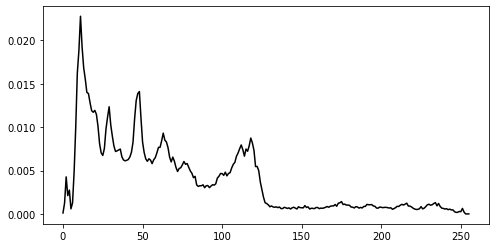

In [ ]:
nhist = hist/np.prod(I.shape) # TO-DO. hist divided by total number of pixels. Can be done with row*col (using np.prod) or sum

fig = plt.figure(figsize = (8, 4))
plt.plot(bins, nhist, 'k')

## Cumulative Histogram

In [ ]:
cu_hist = hist.copy()
# Cumulative sum. So loop starting from 1
for i in range(1, len(cu_hist)):
  cu_hist[i] = hist[i] + cu_hist[i-1]


# Normalized 
# normalized c. histogram is called c. distribution function
cdf = cu_hist/cu_hist[-1] # TO-DO. Divided by last pixel, as it has all the sum.
# cdf = cu_hist / hist.sum()
# cdf = cu_hist / np.prod(I.shape)
# All same
# cdf will always be increasing

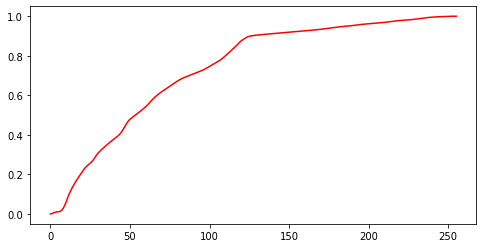

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, cdf, 'r')

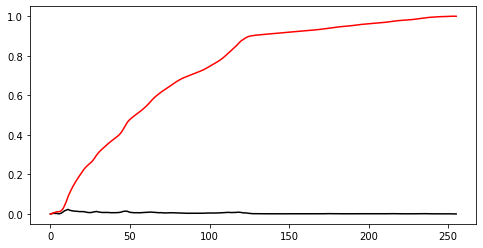

In [ ]:
# plot on the same axes
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, nhist, 'k')
plt.plot(bins, cdf, 'r')

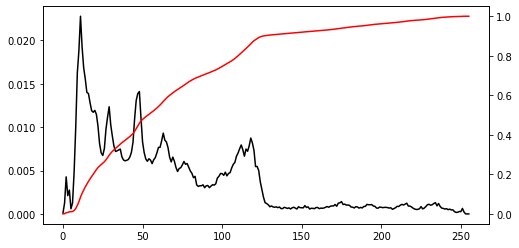

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, nhist, 'k')
# plt.labely("Probablity")
#TO-DO. Showing previous histograms more clearly with twin axis
plt.twinx()
plt.plot(bins, cdf, 'r')
# plt.labely("CDF")

# Histogram Calculation - Library Function


## Histogram
```python
hist, bins_hist = exposure.histogram(Image.ravel(), nbins: int, normalize: bool)
```

`nbins` is the number of bins between `min(Image)` and `max(Image)`. If `normalize = True`, the histogram will be normalized

In [ ]:
# ravel - makes 1D array from multi-dimensional array i.e. row * col
hist, bins = exposure.histogram(I.ravel(), nbins = ..., normalize = ...)
nhist, bins = exposure.histogram(I.ravel(), nbins = ..., normalize = ...)

print(hist[:5])
print(bins[:5])

[0.00010851 0.00125687 0.00426794 0.00210684 0.00274884]
[0 1 2 3 4]


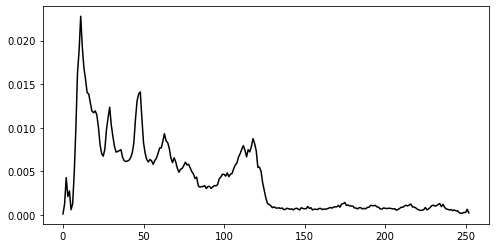

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, hist, 'k')

## Cumululative Histogram
```python
cdf, bins_hist = exposure.cumulative_distribution(Image.ravel(), nbins: int)
```

`nbins` is the number of bins between `min(Image)` and `max(Image)`.

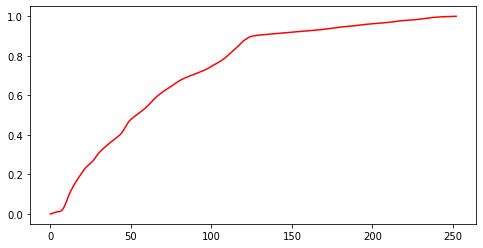

In [ ]:
# ravel - makes 1D array from multi-dimensional array i.e. row * col
cdf, bins = exposure.cumulative_distribution(I.ravel(), nbins=256)
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, cdf, 'r')

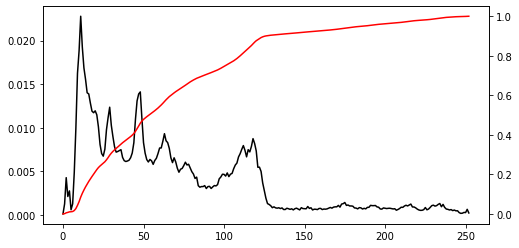

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.plot(bins, nhist, 'k')
plt.twinx()
plt.plot(bins, cdf, 'r')

## Helper function - 1

In [ ]:
# subplots: allows multiple plotting
# figure - entire image including multiple ones
# axis - each image

In [ ]:
# axis (ax) . Can be array type. e.g. (0, 0)
# nrows
# ncols
# ax.plot(...)
# ax.title(...)
# ax.setx_label(...)
# ax.axis("off")
# ax.set_xlim(...)

In [ ]:
def plot_hist(I, ax, nbins=256, normalize=True, plot_cdf=True, title = ""):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    ax.plot(bins_hist, hist, 'k')
    ax.set_xlabel("pixel values")
    ax.set_title(title)
    if normalize:
        ax.set_ylabel("probability")
    else:
        ax.set_ylabel("count")
    xmax = 1 if I.max() <= 1 else 255 # If normalized, then 1 else 255
    ax.set_xlim([0, xmax])

    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        ax_temp = ax.twinx() # overlapping axis
        ax_temp.plot(bins_cdf, cdf, 'r', lw=3)
        ax_temp.set_ylabel("percentage")
        return bins, hist, cdf

    return bins, hist

Figure(576x288)


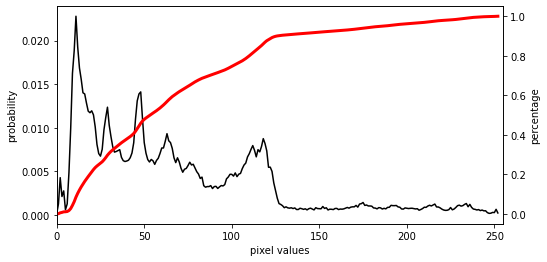

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))

plot_hist(I, ax, nbins=256, normalize=True, plot_cdf=True)
print(fig)

## Subplots and axes

In [ ]:
# Color scale is used by axis and imshow
# By default imshow - grayscale
# cmap = "gray"

In [ ]:
fig, (ax1, )

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 4))


# fig, ((a, b), (c, d)) = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 4))

In [ ]:
a.imshow(I, cmap = "gray")
a.axis("off")

In [ ]:
fig

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (6, 6))

ax1.imshow(I, cmap = "gray")
plot_hist(I, ax2, nbins=256, normalize=True, plot_cdf=True)
print(fig)

## Histogram of Color Image

In [ ]:
I = io.imread("good.jpeg")
io.imshow(I)
plt.axis("off")

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (45, 5))

# Red Blue Green channel being taken differently
ax1.imshow(I)
bins_r, hist_r, cdf_r = plot_hist(I[:, :, 0], ax2, normalize=True, plot_cdf=True, title="Red")
bins_g, hist_g, cdf_g = plot_hist(I[:, :, 1], ax3, normalize=True, plot_cdf=True, title="Green")
bins_b, hist_b, cdf_b = plot_hist(I[:, :, 2], ax4, normalize=True, plot_cdf=True, title="Blue")

print(fig)

## Helper function 2

In [ ]:
def plot_img_and_hist(I, color = False):
  if color:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (45, 5))
    ax1.imshow(I)
    ax1.axis("off")

    bins_r, hist_r, cdf_r = plot_hist(I[:, :, 0], ax2, normalize=True, plot_cdf=True, title="Red")
    bins_g, hist_g, cdf_g = plot_hist(I[:, :, 1], ax3, normalize=True, plot_cdf=True, title="Green")
    bins_b, hist_b, cdf_b = plot_hist(I[:, :, 2], ax4, normalize=True, plot_cdf=True, title="Blue")

  else:
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (6, 6))
    ax1.imshow(I, cmap = "gray")
    ax1.axis("off")
    
    plot_hist(I, ax2, nbins=256, normalize=True, plot_cdf=True)
  

# Histogram Equalization

In [ ]:
# Changing cumulative curve as close to straight line

In [ ]:
I = io.imread("land.jpeg")

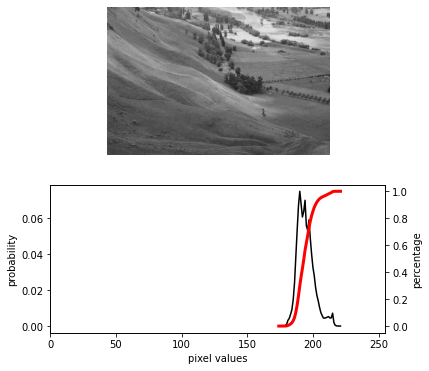

In [ ]:
plot_img_and_hist(I)

## Regular Histogram Equalization

In [ ]:
Ieq = exposure.equalize_hist(I)

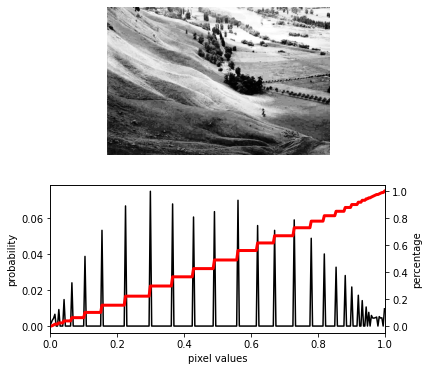

In [ ]:
plot_img_and_hist(Ieq)

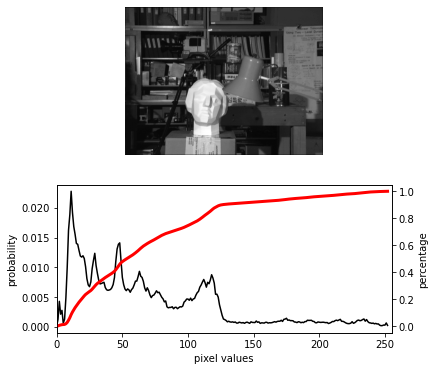

In [ ]:
I = io.imread("tsukuba.png")
plot_img_and_hist(I)

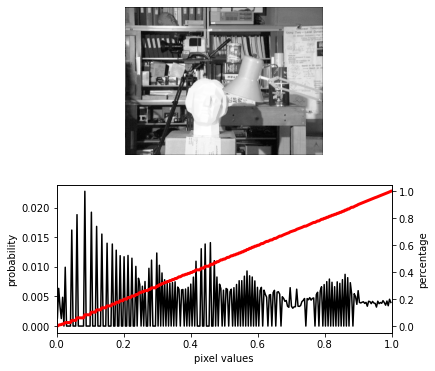

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

## Adaptive Histogram Equalization

In [ ]:
# Works on a certain patch

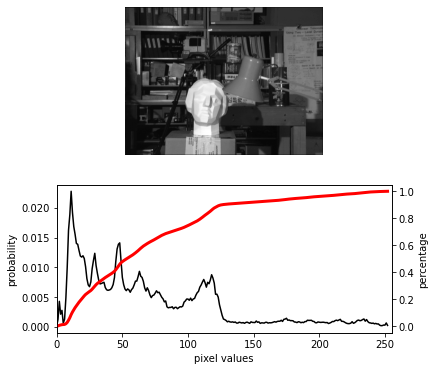

In [ ]:
I = io.imread("tsukuba.png")
plot_img_and_hist(I)

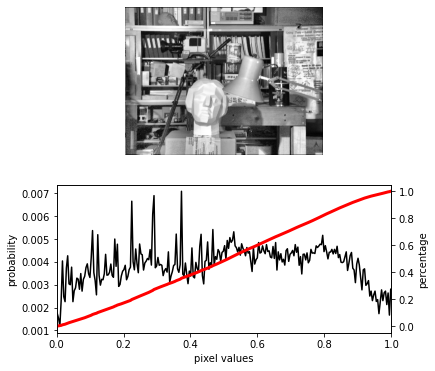

In [ ]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0)
plot_img_and_hist(I_adapt_eq)

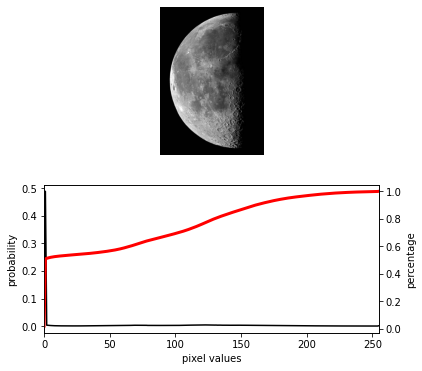

In [ ]:
I = io.imread("HalfMoon.jpeg")
plot_img_and_hist(I)

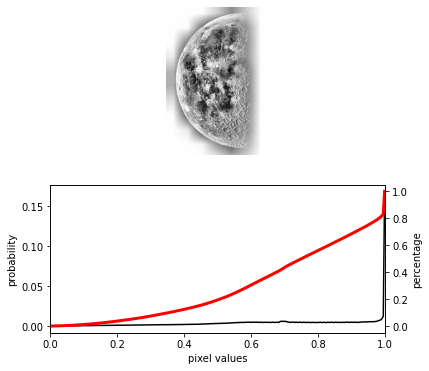

In [ ]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0)
plot_img_and_hist(I_adapt_eq)

## CLAHE

In [ ]:
# Smooths histogram, unlike previous where there were sharp images

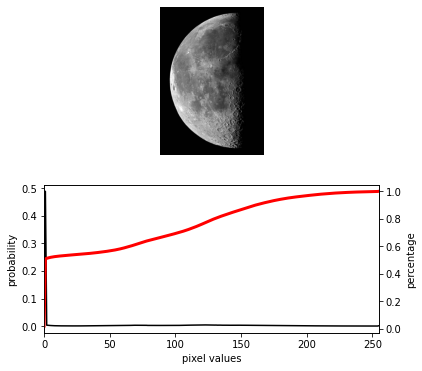

In [ ]:
I = io.imread("HalfMoon.jpeg")
plot_img_and_hist(I)

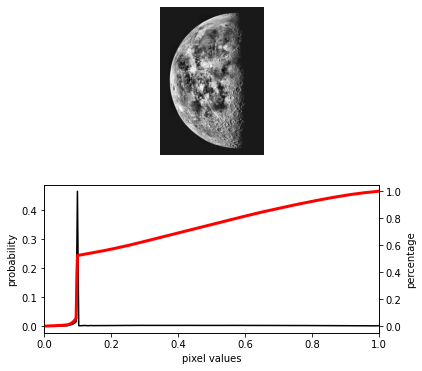

In [ ]:
I_clahe = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.1)
plot_img_and_hist(I_clahe)

## Equalization of Color Image

In [ ]:
# Take image to another plane
# To HSV = hue saturation value
# lab = L: 0 is black and 100 is white

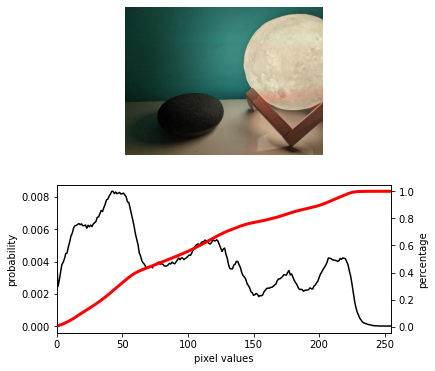

In [ ]:
# Wrong
I = io.imread("good.jpeg")
plot_img_and_hist(I)

In [ ]:
Ilab = color.rgb2lab(I)
print(I.shape)
print(Ilab.shape)

(756, 1008, 3)
(756, 1008, 3)


In [ ]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.0
95.86054755805809


In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [ ]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

In [ ]:
Ilab[:, :, 0] = Ieq*100

In [ ]:
Irecon = color.lab2rgb(Ilab)

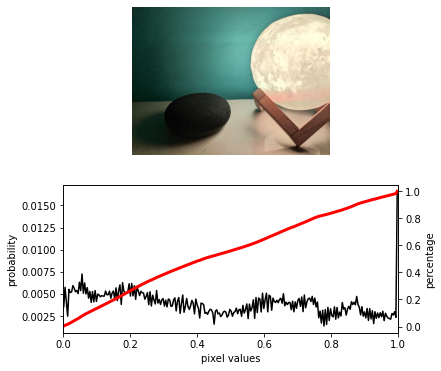

In [ ]:
plot_img_and_hist(Irecon)